In [4]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('../../')

from astroLuSt.database_interface import alerceinterface as aldiai
from astroLuSt.styles import plot_styles as alstps

importlib.reload(aldiai)

_ = alstps.tre_light()



# AlerceDatabaseInterface

AlerceDatabaseInterface(
    n_jobs=1,
    sleep=0.002,
    verbose=0,
)


,oid_ztf,ndethist_ztf,ncovhist_ztf,mjdstarthist_ztf,mjdendhist_ztf,corrected_ztf,stellar_ztf,ndet_ztf,g_r_max_ztf,g_r_max_corr_ztf,...,dej2000_ztf,sigmara_ztf,sigmadec_ztf,class_ztf,classifier_ztf,probability_ztf,step_id_corr_ztf,id,ra,dec
0,ZTF19acduwin,2225,4501,58095.129444,60450.478206,True,False,215,0.1117,-0.045019,...,27.022043,0.018363,0.016358,None,None,None,24.4.1,10054,12.39495833,27.02213889
1,ZTF22abbjfyk,16,2921,58457.250000,59810.500000,True,True,2,NaN,NaN,...,27.022294,0.000255,0.000179,None,None,None,dev,10054,12.39495833,27.02213889
2,ZTF17aabulmo,427,2279,58095.130093,60619.310602,True,False,282,NaN,NaN,...,34.218342,0.035154,0.029069,None,None,None,24.5.2a6,object3,16.294625,34.21841667
3,ZTF20aaeaiom,994,3031,58305.500000,59984.250000,True,False,115,0.4762,0.375844,...,41.488621,0.000140,0.000098,None,None,None,1.1.6,10147,359.6756667,41.48880556
4,ZTF18aceudwl,1546,3458,58302.500000,60150.500000,True,False,38,0.6445,0.345807,...,41.488784,0.000067,0.000114,None,None,None,1.2.0,10147,359.6756667,41.48880556
5,ZTF20acuuugt,2005,3389,58101.250000,60085.500000,True,False,132,1.0293,0.535156,...,41.488633,0.000117,0.000099,None,None,None,1.2.0,10147,359.6756667,41.48880556


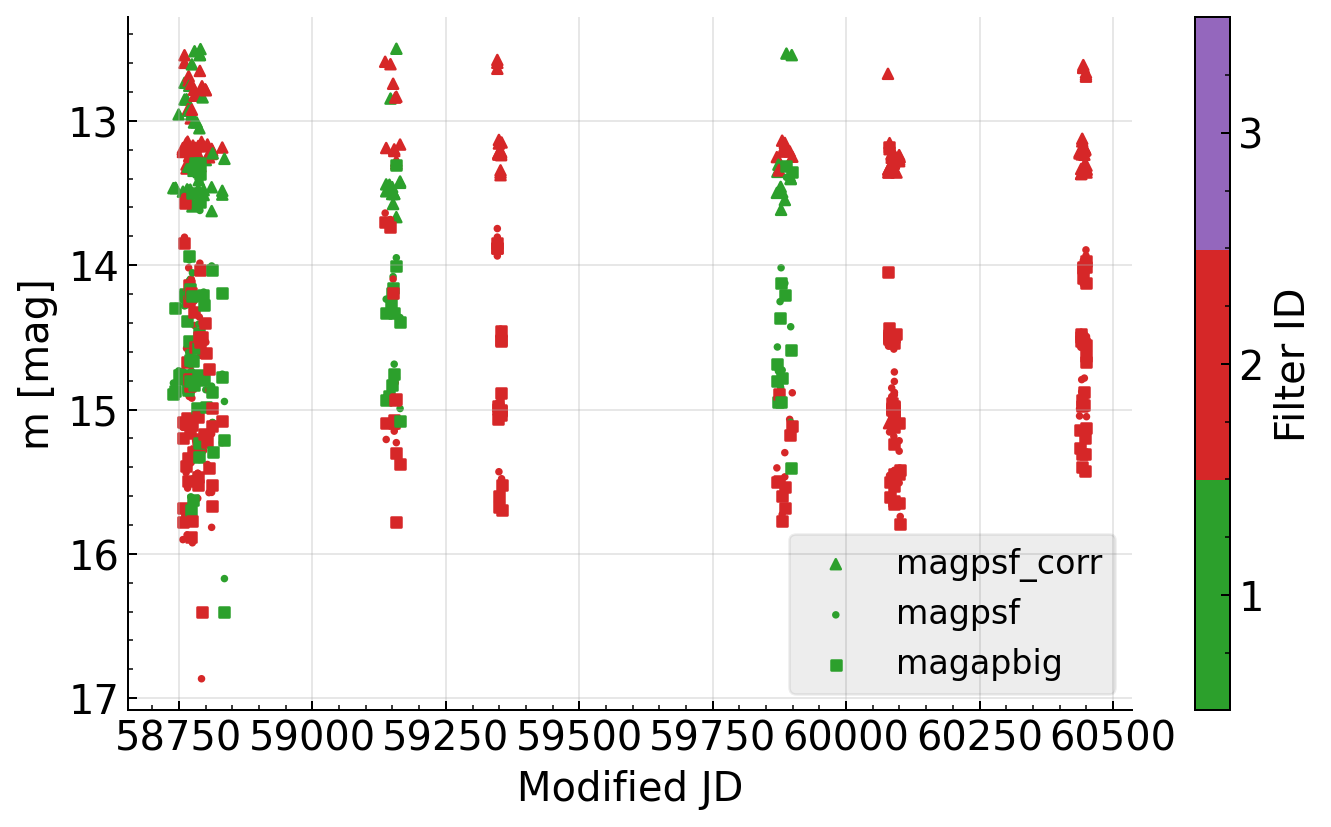

In [18]:
importlib.reload(aldiai)

ADI = aldiai.AlerceDatabaseInterface(
    sleep=2e-3,
    n_jobs=1,
    verbose=0,
)
print(ADI)

df = pd.DataFrame(
    data=np.array([
        [10054,	12.39495833, 27.02213889,],
        ["object2",	353.7751667, np.inf,],#41.10291667,],   #NOTE: ill fail
        ["object3",	16.294625,	 34.21841667,],
        [10147,	359.6756667, 41.48880556,],
    ]),
    columns=['id', 'ra', 'dec']
)

df_ztf = ADI.crossmerge_by_coordinates(
    df_coords=df,
    ra_colname='ra', dec_colname='dec', radius=1,
    sleep=None,
    n_jobs=None,
    verbose=None,
    parallel_kwargs=None,
)
display(df_ztf)
# display(ADI.LE.df_errorlog)   #failed extractions

dfs_lc = ADI.download_lightcurves(
    ztf_ids=list(df_ztf['oid_ztf']) + ["ZTF1"], #"ZTF1" will fail
    # save=False,
    save='../_data/',
    redownload=True,
    sleep=None,
    n_jobs=None,
    verbose=None,
    parallel_kwargs=None,
)
# display(ADI.LE.df_errorlog.query("suffix == 'download_one'"))   #failed extractions

fig, axs = ADI.plot_result(dfs_lc[0])
